# 1.)

# Dataset:
http://www.statovations.de/docs/temp/air_temp_2017.tar.gz


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
path = "resources/air_temp_2017/air_temp."
# Latidude and lontidude for Kempten.
lat = 47.750
lon = 10.250
months = ["Jan", "Feb", "March", "April", "May", "Juny", "July", "Aug", "Sep", "Oct", "Nov", "Dec"]
columns = ["Lon", "Lat"]
columns.extend(months)
columns.append("Mean")

def get_df_for_year(year, lon=None, lat=None):
    if not isinstance(year, str): year = str(year)
    df = pd.read_csv(path + year, delim_whitespace=True, names=columns)
    if lon and lat:
        df = df[ (df["Lat"] == lat) & (df["Lon"] == lon)]
    return df

def get_df_for_all_years(start, end, lon=None, lat=None):
    df = None
    for i in range(start, end + 1):
        current_df = get_df_for_year(i, lon, lat)
        if df is None:
            df = current_df
        else:
            df = pd.concat([df, current_df])
    return df
        

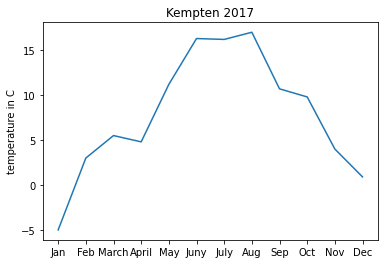

In [3]:
temp_values = []
for year in range(1900, 2017 + 1):
    df = get_df_for_year(year, lon, lat)
    values = df[months].values.flatten().tolist()
    values.append(float(df["Mean"]))
    temp_values.append((year, values))

fig, ax = plt.subplots()
month_indices = [i for i in range(0, 12)]

values_2017 = temp_values[-1]

ax.plot(month_indices, values_2017[1][:-1])
ax.set_xticks(month_indices)
ax.set_xticklabels(months)
ax.set_ylabel("temperature in C")
ax.set_title("Kempten 2017")
plt.show()
    



In [4]:
df_for_all_years = get_df_for_all_years(1900, 2017, lon, lat)

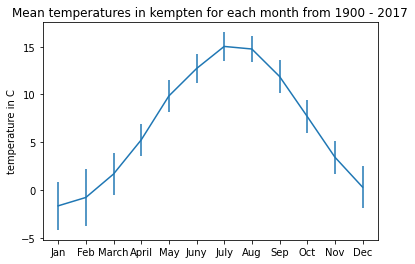

In [5]:
mean_temp_values = df_for_all_years[months].mean()
std_temp_values = df_for_all_years[months].std()

fig, ax = plt.subplots()
ax.errorbar(month_indices, mean_temp_values, yerr=std_temp_values)
ax.set_xticks(month_indices)
ax.set_xticklabels(months)
ax.set_ylabel("temperature in C")
ax.set_title("Mean temperatures in kempten for each month from 1900 - 2017")
plt.show()


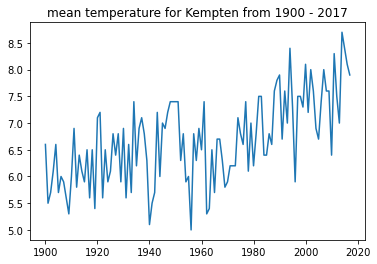

In [6]:
fig, ax = plt.subplots()
year_indices = [i for i in range(1900, 2017 + 1)]
mean_temp_values = [temp_value[1][-1] for temp_value in temp_values]

ax.plot(year_indices, mean_temp_values)
ax.set_title("mean temperature for Kempten from 1900 - 2017")
plt.show()
    

# 2.)

/home/edgar/anaconda3/envs/env_study/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3441: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/home/edgar/anaconda3/envs/env_study/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3441: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/home/edgar/anaconda3/envs/env_study/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3441: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


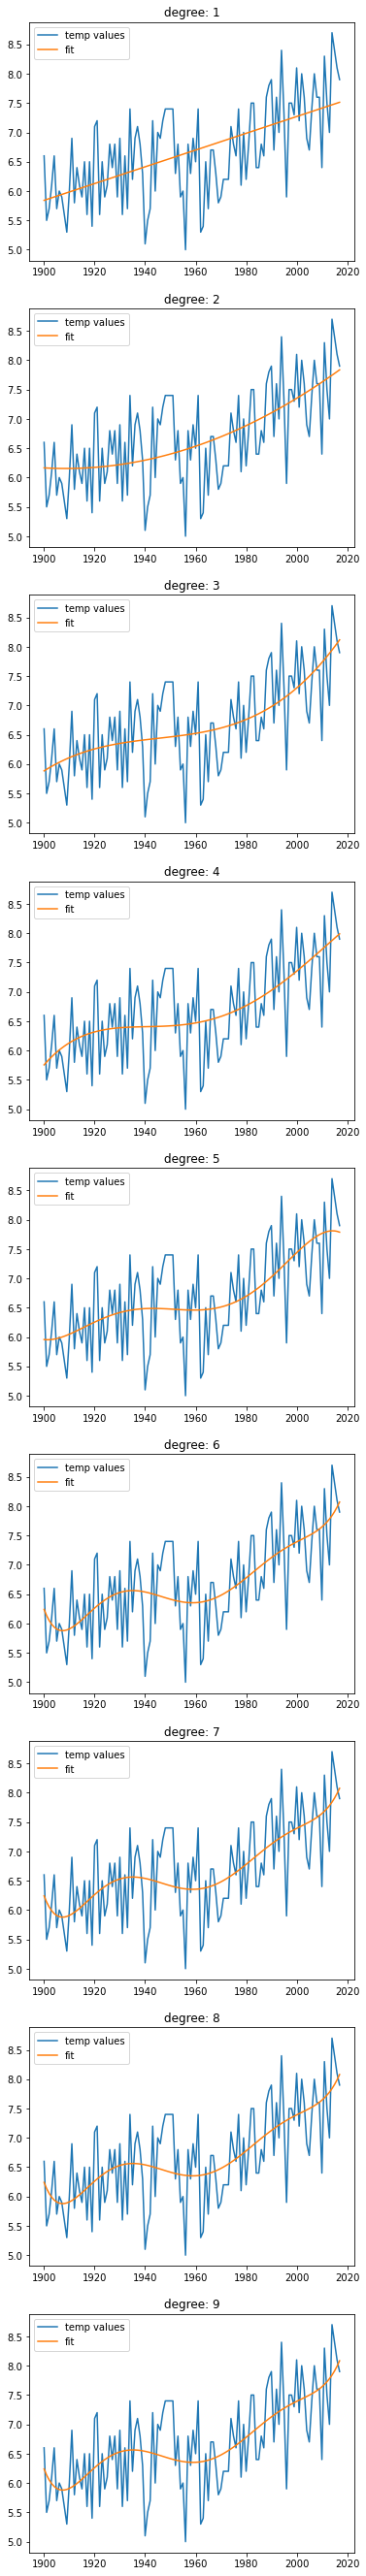

In [7]:
fig, ax = plt.subplots(figsize=[6,48], nrows=9)
for i in range(1, 10):
    fit = np.polyfit(year_indices, mean_temp_values, i)
    p = np.poly1d(fit)
    x = np.array(year_indices)
    ax[i-1].plot(year_indices, mean_temp_values, label="temp values")
    ax[i-1].plot(year_indices, p(x), label="fit")
    ax[i-1].legend()
    ax[i-1].set_title("degree: " + str(i))

plt.show()

Ab Grad 6 keine nennenswerten Verbesserungen, also am ehesten Grad 6.

# 3.)

In [8]:
import pandas_datareader as pdr
import pandas_datareader.data as web
import datetime as dt

aapl = pdr.get_data_yahoo("AAPL",
                          start=dt.datetime(2006,1,1),
                          end=dt.datetime(2017,12,31))


In [9]:
aapl

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2006-01-03,2.669643,2.580357,2.585000,2.669643,807234400.0,2.288858
2006-01-04,2.713571,2.660714,2.683214,2.677500,619603600.0,2.295595
2006-01-05,2.675000,2.633929,2.672500,2.656429,449422400.0,2.277529
2006-01-06,2.739286,2.662500,2.687500,2.725000,704457600.0,2.336321
2006-01-09,2.757143,2.705000,2.740357,2.716071,675040800.0,2.328664
...,...,...,...,...,...,...
2017-12-22,43.855000,43.625000,43.669998,43.752499,65397600.0,41.845699
2017-12-26,42.867500,42.419998,42.700001,42.642502,132742000.0,40.784077
2017-12-27,42.695000,42.427502,42.525002,42.650002,85992800.0,40.791245


In [10]:
df = get_df_for_all_years(2006, 2017)
df

,Lon,Lat,Jan,Feb,March,April,May,Juny,July,Aug,Sep,Oct,Nov,Dec,Mean
0,-179.75,71.25,-22.9,-21.6,-24.1,-19.9,-5.5,0.9,1.8,1.3,0.2,-3.4,-7.3,-20.5,-10.1
1,-179.75,68.75,-26.7,-25.2,-25.2,-22.5,-5.5,1.8,2.1,1.9,1.8,-4.8,-10.4,-22.7,-11.3
2,-179.75,68.25,-28.0,-25.9,-25.8,-23.4,-6.4,1.8,2.7,2.1,1.1,-5.9,-11.7,-23.9,-11.9
3,-179.75,67.75,-28.1,-24.8,-24.8,-22.5,-5.5,3.8,5.8,4.4,2.0,-5.7,-11.9,-23.8,-10.9
4,-179.75,67.25,-32.0,-27.6,-27.2,-25.1,-8.0,2.8,6.1,3.7,-0.4,-9.1,-15.9,-27.7,-13.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85789,179.75,-87.75,-26.1,-36.9,-48.3,-55.0,-54.3,-55.5,-56.9,-57.6,-56.4,-45.2,-34.0,-26.3,-46.0
85790,179.75,-88.25,-26.6,-37.8,-49.5,-56.6,-55.9,-56.7,-58.0,-58.9,-57.4,-46.1,-34.7,-26.8,-47.1
85791,179.75,-88.75,-26.7,-38.3,-50.1,-57.5,-56.7,-57.4,-58.5,-59.6,-57.8,-46.4,-35.0,-27.0,-47.6
85792,179.75,-89.25,-26.6,-38.4,-50.6,-57.9,-56.9,-57.7,-58.5,-59.8,-57.8,-46.4,-35.1,-27.0,-47.7


In [11]:
sorted_df = df.sort_values(["Lon", "Lat"])
sorted_df

,Lon,Lat,Jan,Feb,March,April,May,Juny,July,Aug,Sep,Oct,Nov,Dec,Mean
20,-179.75,-89.75,-27.4,-41.6,-55.8,-55.8,-56.1,-57.7,-64.8,-58.5,-60.0,-55.2,-37.1,-29.2,-49.9
20,-179.75,-89.75,-26.1,-41.4,-56.7,-60.2,-55.1,-51.7,-57.4,-59.8,-59.9,-49.3,-37.8,-27.7,-48.6
20,-179.75,-89.75,-29.4,-40.9,-54.2,-53.7,-58.7,-61.0,-56.1,-59.3,-53.4,-50.5,-38.1,-26.3,-48.5
20,-179.75,-89.75,-26.6,-41.3,-50.8,-58.1,-51.0,-54.4,-57.4,-60.7,-55.8,-49.8,-36.3,-26.6,-47.4
20,-179.75,-89.75,-24.9,-37.2,-49.9,-62.2,-53.5,-60.1,-58.2,-57.5,-61.4,-48.7,-37.3,-26.2,-48.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85773,179.75,71.25,-24.0,-29.5,-20.9,-14.0,-8.3,-0.2,2.0,-0.8,-2.9,-9.2,-17.5,-18.3,-12.0
85773,179.75,71.25,-21.8,-18.3,-21.3,-16.4,-6.9,-2.1,1.3,2.5,-0.7,-4.9,-10.3,-21.4,-10.0
85773,179.75,71.25,-21.0,-24.0,-26.9,-16.6,-5.9,0.8,3.3,1.4,-1.1,-5.0,-15.5,-23.1,-11.1
85773,179.75,71.25,-21.5,-21.5,-24.3,-16.1,-6.0,0.3,1.3,0.9,-1.1,-1.2,-10.6,-15.6,-9.6


# 4.)

Ein komplett perfekter Fit wird kaum möglich sein, höchstens einer der sehr nah dran ist.